<a href="https://colab.research.google.com/github/RP-Kratu/KRATU/blob/main/LiveDataTest_RaspiShakeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install obspy

In [12]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
start_1 = "2020-01-01 00:00:00"
starttime = UTCDateTime(start_1)
endtime = starttime + 600       # 600 seconds
client = Client('RASPISHAKE')
waveform = client.get_waveforms('AM', 'R24FA', '00', 'EHZ', starttime, endtime)

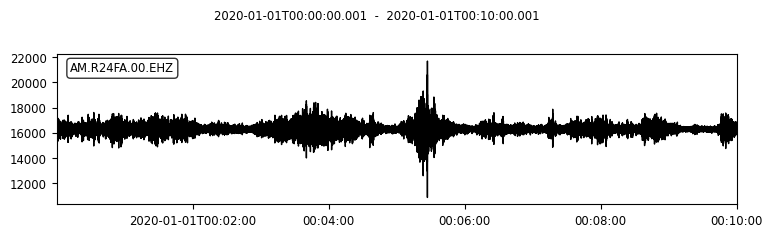

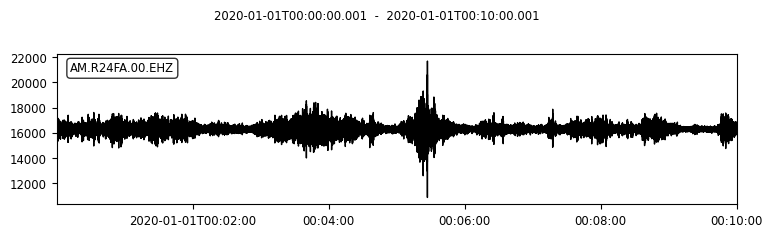

In [13]:
waveform.plot()

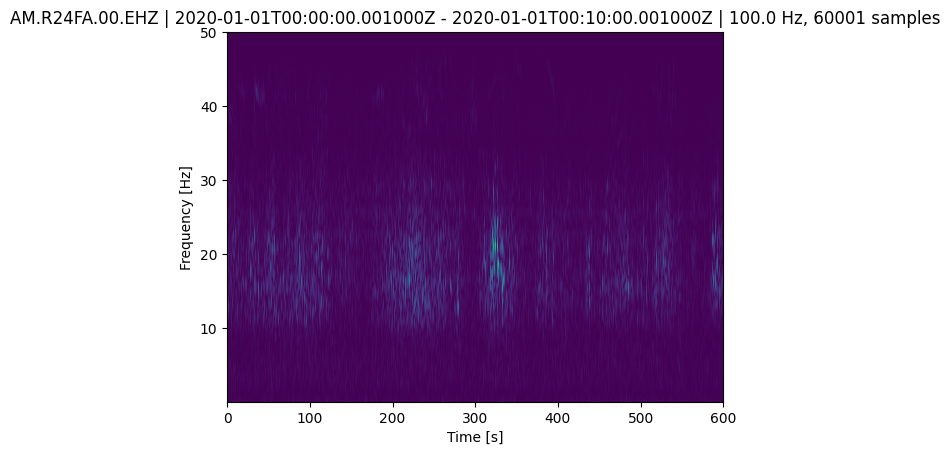

In [14]:
waveform[0].spectrogram()

In [15]:
!pip install librosa==0.9.2

In [16]:
import librosa
import numpy as np

# Assuming 'waveform' is your obspy Stream object and you want to process the first trace
trace = waveform[0]

# Get the data as a NumPy array
data = trace.data

# Get the sampling rate
sampling_rate = trace.stats.sampling_rate

# Calculate MFCCs
mfccs = librosa.feature.mfcc(y=data.astype(float), sr=sampling_rate)

# The 'mfccs' variable now contains the MFCCs as a NumPy array.
# You can further process or visualize this array.
# For example, to see the shape of the MFCC array:
print(mfccs.shape)

(20, 118)


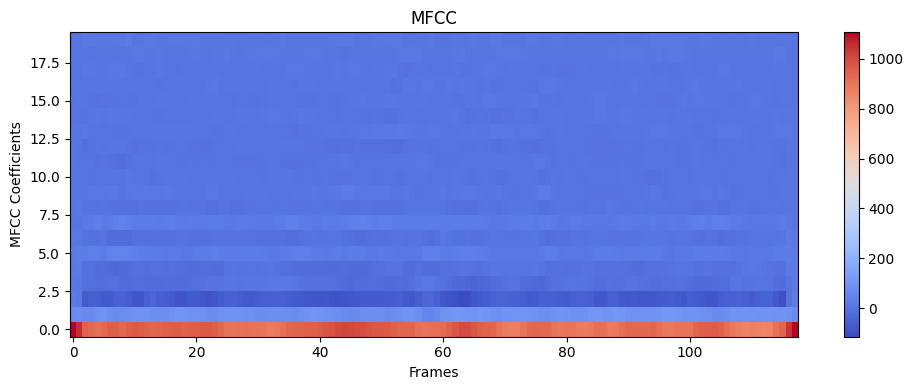

In [17]:
import matplotlib.pyplot as plt
import numpy as np # You might need this if you haven't imported it yet

# Assuming 'mfccs' is the NumPy array containing your MFCCs from the previous step

plt.figure(figsize=(10, 4))
plt.imshow(mfccs, aspect='auto', origin='lower', cmap='coolwarm') # You can choose a different colormap
plt.colorbar()
plt.title('MFCC')
plt.xlabel('Frames')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()

In [18]:
!pip install scipy
!pip install matplotlib

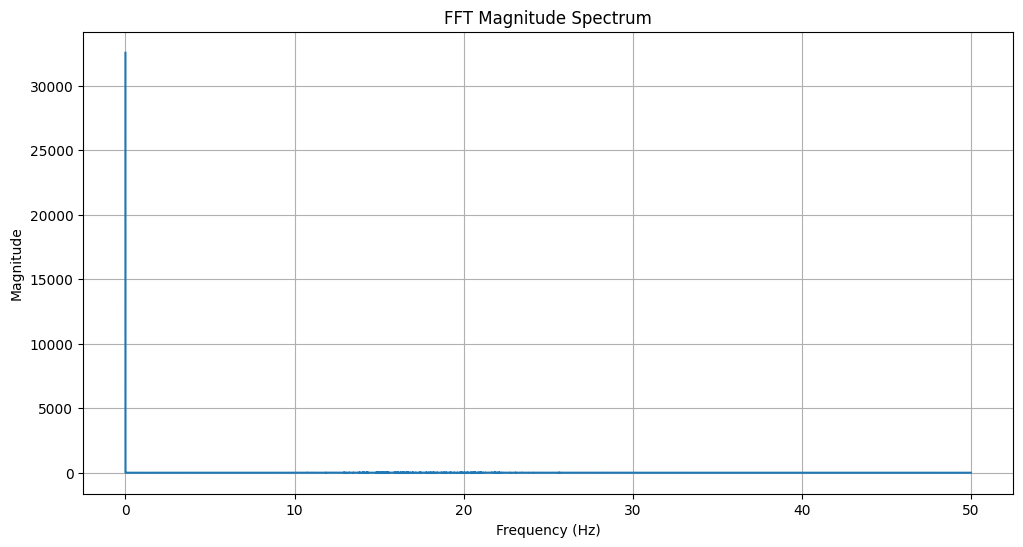

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.fft import fft, fftfreq

# Assuming 'waveform' is your obspy Stream object and you want to process the first trace
trace = waveform[0]

# Get the data as a NumPy array
data = trace.data

# Get the sampling rate
sampling_rate = trace.stats.sampling_rate
n_samples = len(data)

# Perform the FFT
yf = fft(data)
xf = fftfreq(n_samples, 1 / sampling_rate)

# Plot the magnitude spectrum (only positive frequencies)
plt.figure(figsize=(12, 6))
plt.plot(xf[:n_samples // 2], 2.0/n_samples * np.abs(yf[0:n_samples // 2]))
plt.grid()
plt.title('FFT Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.show()